## Kaggle: Breast Cancer Wisconsin Diagnostic Dataset
https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from autosklearn.classification import AutoSklearnClassifier

import os

%matplotlib inline

### Data ingestion

In [11]:
data = pd.read_csv('../../data/kaggle_breast_cancer_wisconsin_diagnostic_dataset.csv')
print(data.info())
data = data.iloc[:,1:]
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [51]:
print(data['y'].value_counts())

B    357
M    212
Name: y, dtype: int64


### Split data into train and test sets

In [15]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=10)
print(train_df.shape)
print(test_df.shape)

(455, 31)
(114, 31)


### Data analysis

In [35]:
# checking for null
print(train_df.isna().values.sum())

0


In [36]:
train_df.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.116976,19.217121,91.898176,654.548132,0.096304,0.104217,0.088622,0.048811,0.180724,0.062768,...,16.228125,25.545407,106.958505,876.358462,0.131985,0.254288,0.273149,0.113883,0.289339,0.083774
std,3.566892,4.377871,24.608416,356.547609,0.013882,0.053328,0.079753,0.039253,0.026652,0.006936,...,4.870142,6.264037,33.833780,574.581600,0.022149,0.162286,0.214956,0.066513,0.062204,0.018165
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.655000,16.045000,74.700000,413.900000,0.086750,0.065090,0.028985,0.020290,0.161800,0.057805,...,12.995000,20.900000,83.875000,511.500000,0.116900,0.146450,0.110900,0.063390,0.248350,0.071465
50%,13.280000,18.800000,85.840000,542.900000,0.095790,0.089630,0.059280,0.033260,0.179400,0.061400,...,14.840000,25.210000,97.170000,672.400000,0.131200,0.209600,0.221000,0.098150,0.281800,0.079610
75%,16.050000,21.640000,105.400000,795.500000,0.105000,0.130600,0.131500,0.074020,0.196050,0.066070,...,18.775000,29.370000,125.650000,1077.000000,0.144650,0.332000,0.384100,0.161300,0.317150,0.091300
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426400,0.191300,0.274300,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


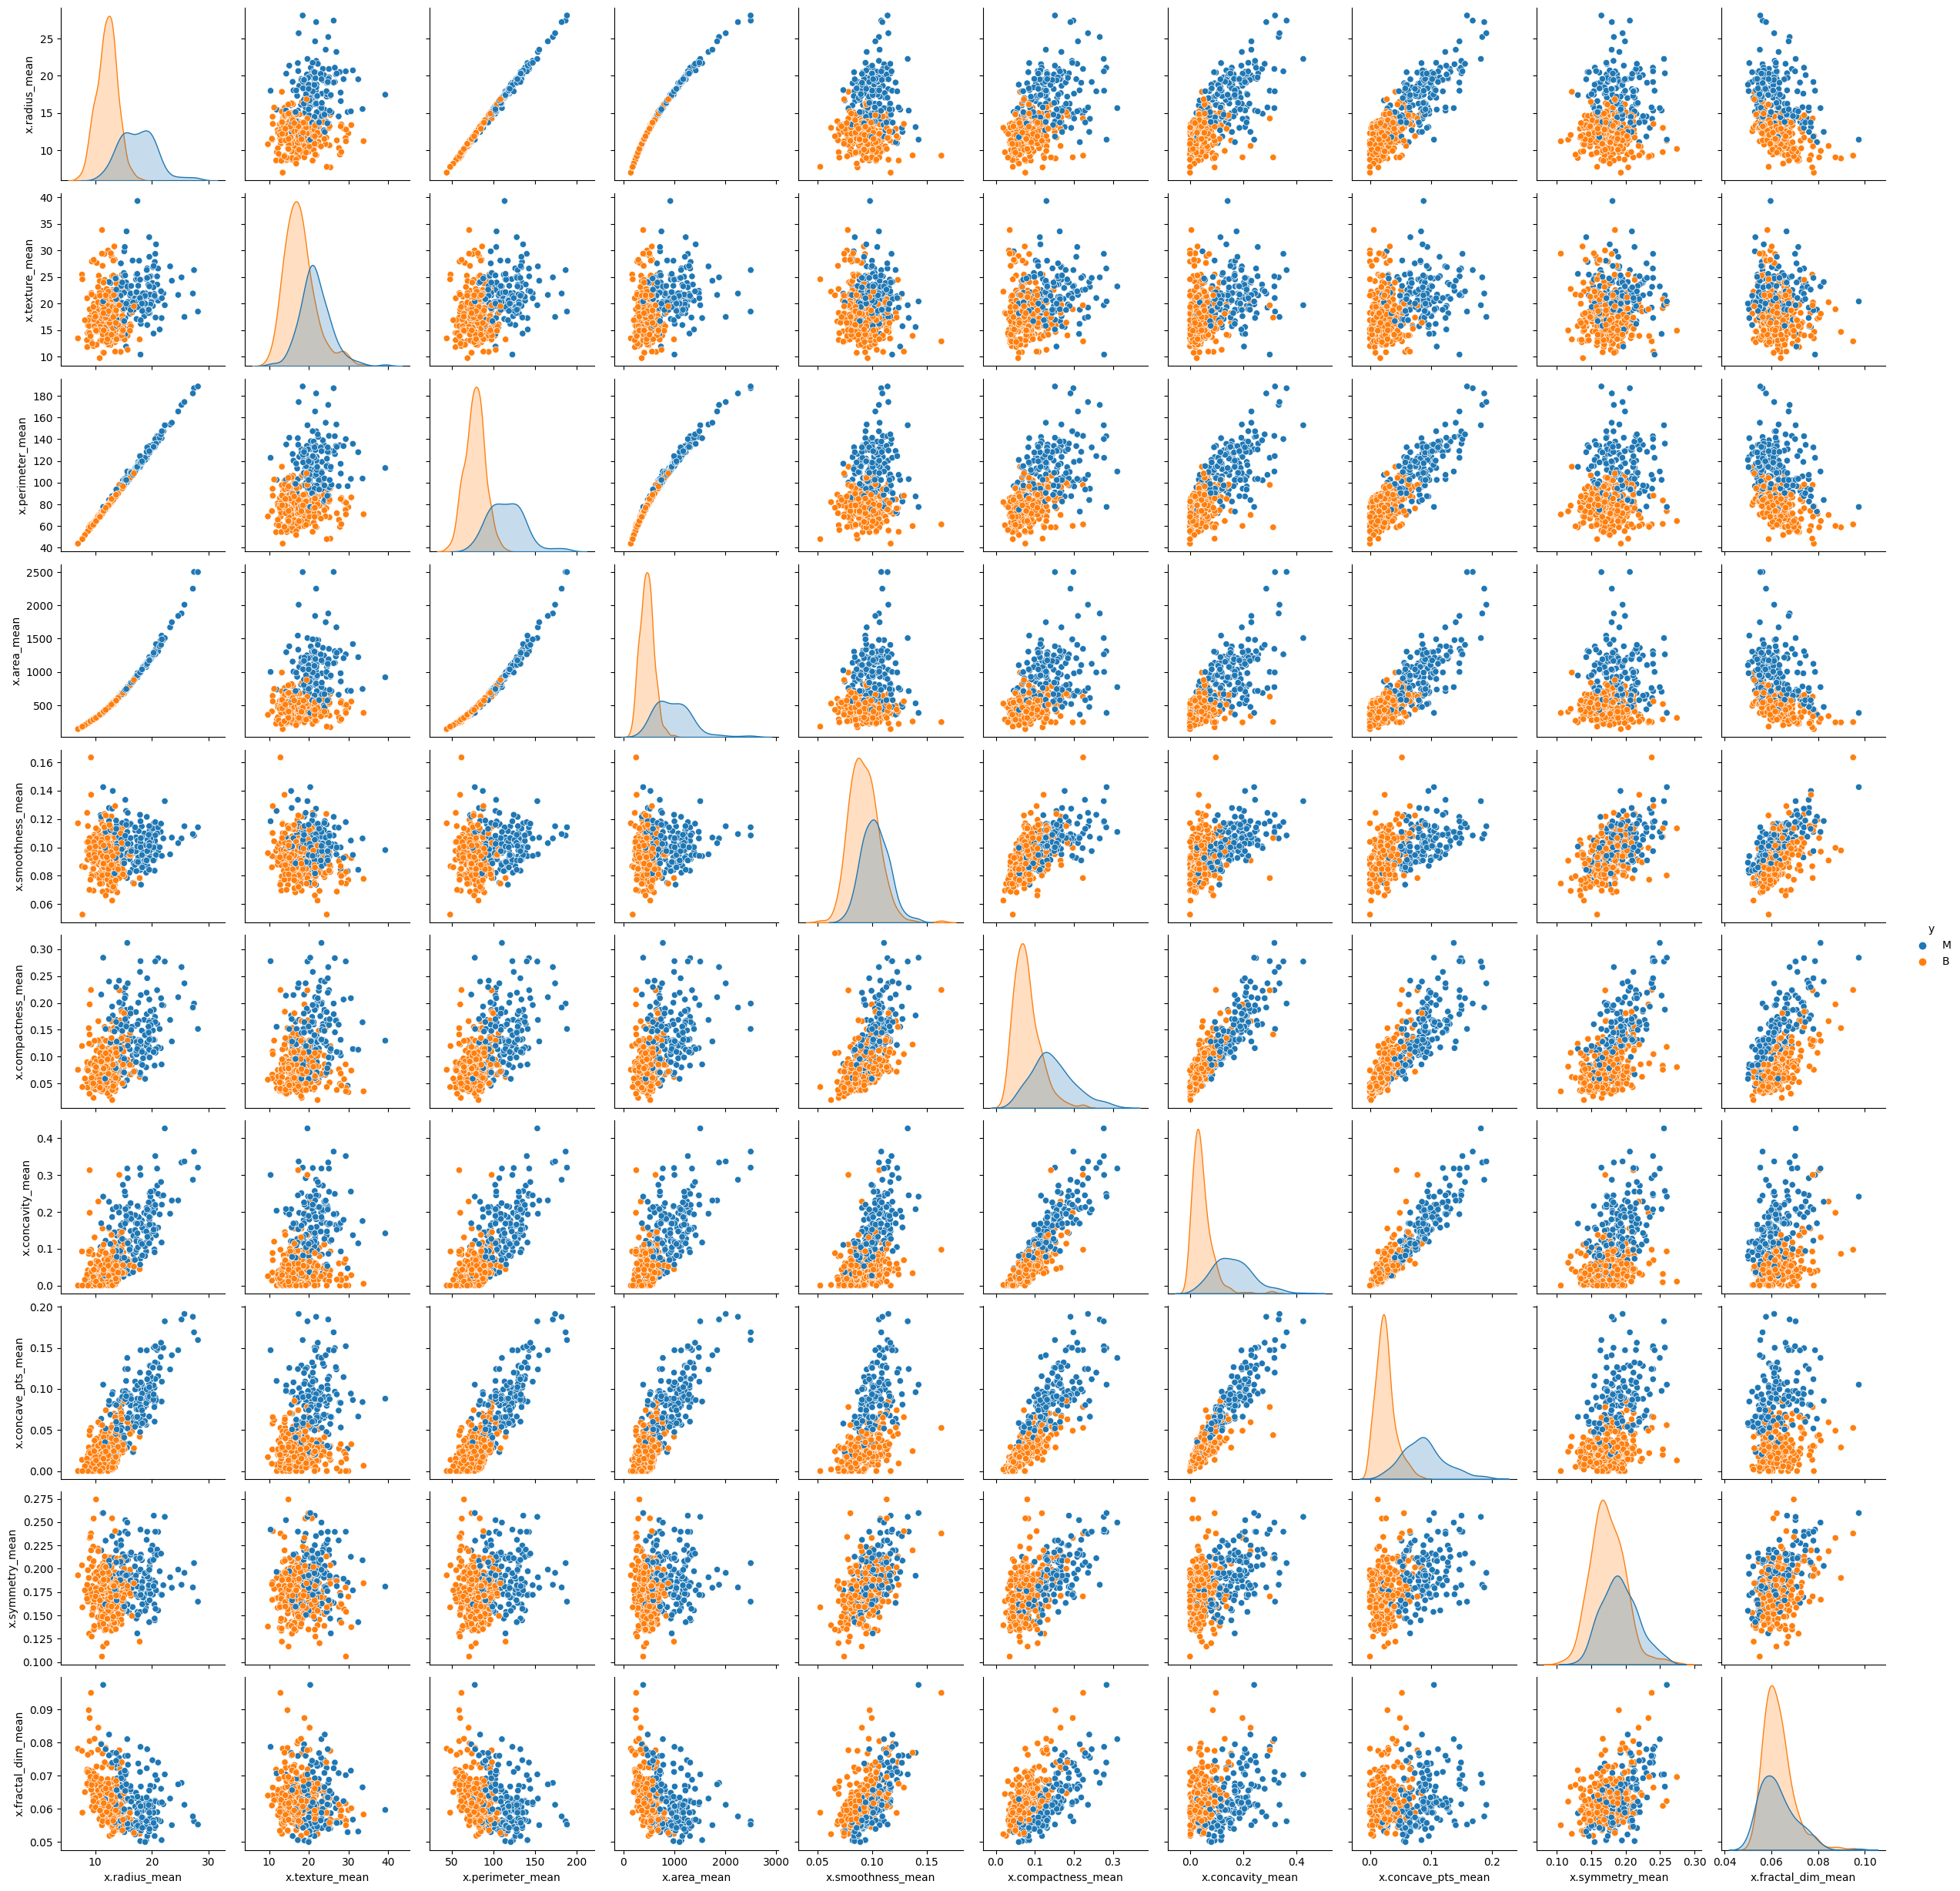

In [42]:
# get mean columns and look for correlation
mean_columns = [col for col in train_df.columns if '_mean' in col or col == 'y']
sns.pairplot(train_df[mean_columns], hue='y')

In [48]:
train_df.corr(numeric_only=True)

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
x.radius_mean,1.000000,0.325454,0.998011,0.986638,0.184465,0.524889,0.705209,0.838378,0.152806,-0.297686,...,0.972962,0.302676,0.967887,0.942751,0.130899,0.417717,0.536471,0.751619,0.153797,0.029957
x.texture_mean,0.325454,1.000000,0.330830,0.322251,-0.025838,0.244135,0.317878,0.300592,0.070814,-0.070300,...,0.357203,0.916702,0.361789,0.347877,0.068844,0.279585,0.304611,0.301162,0.095316,0.128346
x.perimeter_mean,0.998011,0.330830,1.000000,0.985917,0.218159,0.573052,0.742215,0.864598,0.183835,-0.248429,...,0.973145,0.307891,0.973329,0.943683,0.159044,0.459046,0.571580,0.777637,0.174698,0.074016
x.area_mean,0.986638,0.322251,0.985917,1.000000,0.189990,0.513624,0.710942,0.837205,0.149778,-0.272289,...,0.965860,0.292832,0.961422,0.962322,0.134034,0.391656,0.517988,0.725744,0.127256,0.020887
x.smoothness_mean,0.184465,-0.025838,0.218159,0.189990,1.000000,0.642300,0.506898,0.539909,0.547928,0.571224,...,0.222294,0.014456,0.246436,0.215314,0.793876,0.470938,0.420559,0.493728,0.380027,0.498550
x.compactness_mean,0.524889,0.244135,0.573052,0.513624,0.642300,1.000000,0.889855,0.830429,0.575697,0.563126,...,0.554662,0.250427,0.609994,0.526504,0.542953,0.877574,0.818306,0.826587,0.481573,0.706438
x.concavity_mean,0.705209,0.317878,0.742215,0.710942,0.506898,0.889855,1.000000,0.926250,0.461318,0.316206,...,0.720199,0.314805,0.761383,0.705340,0.442648,0.775999,0.886380,0.878636,0.388050,0.533556
x.concave_pts_mean,0.838378,0.300592,0.864598,0.837205,0.539909,0.830429,0.926250,1.000000,0.434568,0.153906,...,0.846200,0.296076,0.871127,0.823850,0.438983,0.672149,0.747356,0.912682,0.348216,0.379975
x.symmetry_mean,0.152806,0.070814,0.183835,0.149778,0.547928,0.575697,0.461318,0.434568,1.000000,0.450252,...,0.190286,0.084757,0.223295,0.177526,0.419527,0.478186,0.418418,0.423008,0.695232,0.428709
x.fractal_dim_mean,-0.297686,-0.070300,-0.248429,-0.272289,0.571224,0.563126,0.316206,0.153906,0.450252,1.000000,...,-0.244369,-0.059517,-0.192404,-0.223895,0.474639,0.477865,0.338978,0.176221,0.318234,0.769534


It appears that there are a lot of correlated features here. Hence, we will use autosklearn twice
- on all features
- on a reduced sets of features having applied PCA

### create independent variables and label

In [62]:
y_train_label = train_df['y']
X_train_df = train_df.drop(columns=['y'], axis=1)
y_test_label = test_df['y']
X_test_df = test_df.drop(columns=['y'], axis=1)
print(y_train_label.shape)
print(X_train_df.shape)
print(y_test_label.shape)
print(X_test_df.shape)

(455,)
(455, 30)
(114,)
(114, 30)


### Build model on all features

In [56]:
model_save_path = os.path.join(os.environ['HOME'], 'auto_sklearn_models', 'wisconsin_breast_cancer')
automl = AutoSklearnClassifier(tmp_folder=model_save_path).fit(X_train_df, y_train_label)
# to save time, we could have added the params per_run_time_limit=30, time_left_for_this_task=120,

In [57]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
612,1,0.10,sgd,0.013245,1.132768
197,12,0.06,qda,0.019868,1.070632
217,22,0.02,qda,0.019868,1.307283
219,21,0.02,qda,0.019868,1.355465
252,20,0.04,qda,0.019868,1.349000
277,19,0.02,qda,0.019868,1.261641
287,18,0.12,sgd,0.019868,1.481784
300,17,0.04,qda,0.019868,1.471342
304,16,0.02,qda,0.019868,1.185066


In [66]:
y_pred = automl.predict(X_test_df)
print("Accuracy score:", accuracy_score(y_test_label, y_pred))
print("Precision score:", accuracy_score(y_test_label, y_pred))
print("Recall score:", accuracy_score(y_test_label, y_pred))
print("F1 score:", accuracy_score(y_test_label, y_pred))

Accuracy score: 0.956140350877193
Precision score: 0.956140350877193
Recall score: 0.956140350877193
F1 score: 0.956140350877193


### Build model on all features after applying Standardization

In [70]:
automl_std_pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
X_train_std_scaled = automl_std_pipeline.fit_transform(X_train_df)
automl_stdp = AutoSklearnClassifier(tmp_folder=model_save_path+'1').fit(X_train_std_scaled, y_train_label)

In [71]:
automl_stdp.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
116,1,0.06,libsvm_svc,0.013245,0.960133
120,28,0.02,libsvm_svc,0.013245,0.974397
133,27,0.02,libsvm_svc,0.013245,0.920253
162,26,0.02,libsvm_svc,0.013245,0.950686
229,25,0.06,libsvm_svc,0.013245,0.974412
235,24,0.06,libsvm_svc,0.013245,1.018573
237,23,0.02,libsvm_svc,0.013245,0.999888
239,22,0.02,libsvm_svc,0.013245,0.935472
241,21,0.06,libsvm_svc,0.013245,1.213481


In [72]:
y_std_scaled_pred = automl_stdp.predict(automl_std_pipeline.fit_transform(X_test_df))
print("Accuracy score:", accuracy_score(y_test_label, y_std_scaled_pred))
print("Precision score:", precision_score(y_test_label, y_std_scaled_pred))
print("Recall score:", recall_score(y_test_label, y_std_scaled_pred))
print("F1 score:", f1_score(y_test_label, y_std_scaled_pred))

Accuracy score: 0.9385964912280702
Precision score: 0.9385964912280702
Recall score: 0.9385964912280702
F1 score: 0.9385964912280702


Standardizing did not give us any benefits but also note that the type of model was different when we used standard scaling

### Build model on all features after applying Dimensionality reduction

In [88]:
# find the n component
from sklearn.decomposition import PCA
n = 3
for i in range(1, len(X_train_df.columns)):
    n = i
    pca = PCA(n_components=i).fit(X_train_df)
    if pca.explained_variance_ratio_.sum() > 0.999999:
        break;

print(n)

8


In [91]:
automl_pca_pipeline = Pipeline([
    ('pca_handler', PCA(n_components=n))
])
X_train_pca_reduced = automl_pca_pipeline.fit_transform(X_train_df) 
automl_pca_red = AutoSklearnClassifier(tmp_folder=model_save_path+'2').fit(X_train_pca_reduced, y_train_label)

In [92]:
automl_pca_red.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
331,1,0.24,mlp,0.019868,1.174618
286,2,0.12,mlp,0.026490,0.983562
293,18,0.06,mlp,0.026490,1.113049
329,17,0.02,mlp,0.026490,1.128624
374,16,0.02,mlp,0.026490,1.158119
405,15,0.12,mlp,0.026490,1.104719
411,14,0.02,mlp,0.026490,0.986597
414,13,0.10,mlp,0.026490,1.036828
453,12,0.06,mlp,0.026490,1.178018


In [93]:
y_pca_pred = automl_pca_red.predict(automl_pca_pipeline.fit_transform(X_test_df))
print("Accuracy score:", accuracy_score(y_test_label, y_pca_pred))
print("Precision score:", accuracy_score(y_test_label, y_pca_pred))
print("Recall score:", accuracy_score(y_test_label, y_pca_pred))
print("F1 score:", accuracy_score(y_test_label, y_pca_pred))

Accuracy score: 0.8421052631578947
Precision score: 0.8421052631578947
Recall score: 0.8421052631578947
F1 score: 0.8421052631578947


This one performs even worse off

### Confusion matrix for the best performing model

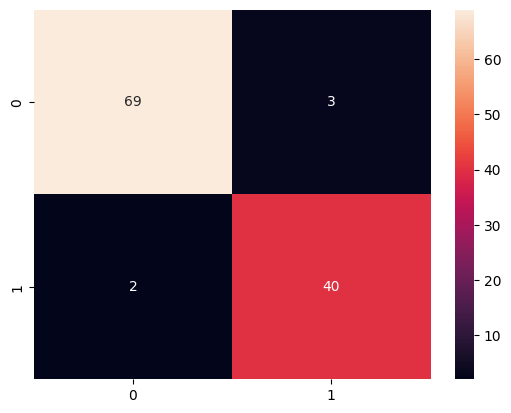

In [104]:
ax = sns.heatmap(confusion_matrix(y_true=y_test_label, y_pred=y_pred), annot=True);
ax.set_xlabel()